<a href="https://colab.research.google.com/github/RosarioH10062002/connectivity-biomarkers-pd-depression/blob/main/ISP_Process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LIBRARIES**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
import re
from collections import Counter
from scipy.io import loadmat
try:
    import nilearn
    from nilearn import image as nimg
    from nilearn import plotting
    from nilearn.connectome import ConnectivityMeasure

except ImportError:
    !pip install nilearn
    import nilearn
    from nilearn import image as nimg
    from nilearn import plotting as nplot
    from nilearn.connectome import ConnectivityMeasure



Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 106.1 MB/s eta 0:00:00


#**UPLOAD DATA**

In [9]:

root_path_pd = Path("/content/drive/MyDrive/M2/Impact Scholar Programme/Preprocessed_data/CONN_PREPROCESS_PD")
root_path_pd_dep = Path("/content/drive/MyDrive/M2/Impact Scholar Programme/Preprocessed_data/CONN_PREPROCESS_PD_DEP")
root_path_ctrl = Path("/content/drive/MyDrive/M2/Impact Scholar Programme/Preprocessed_data/CONN_PREPROCESS_CTRL")

pd_subjects = [100005,100006,100007,100018,100268,101018,101146,101174,101476,101479,101735,101742,101751,101841,102012,102053,102078,102305,102321,102420]
ctrl_subjects = [108909,113043,113050,113369,115698,116230,116231,128335,130028,138022,142086,149120,149716,156484,160890,161329,165043,167746,178413,101195,102447,103161,103183,103467,103542] #103542
pd_subjects_dep =  [100267,100842,101050,102978,174141,182427,184432]

#report
print(f'control subjects: {len(ctrl_subjects)} \n parkinson subjects (no depressed): {len(pd_subjects)} \n parkinson subjects (depressed): {len(pd_subjects_dep)}')


control subjects: 25 
 parkinson subjects (no depressed): 20 
 parkinson subjects (depressed): 7


In [10]:
#@title PD data without depression
pd_paths = {}

for subject in pd_subjects:
    mat_path = (
        root_path_pd
        / str(subject)
        / str(subject)
        / "data"
        / "ROI_Subject001_Session001.mat"
    )
    pd_paths[subject] = mat_path # creamos el diccionario con las rutas
    print(subject, "->", mat_path.exists())


100005 -> True
100006 -> True
100007 -> True
100018 -> True
100268 -> True
101018 -> True
101146 -> True
101174 -> True
101476 -> True
101479 -> True
101735 -> True
101742 -> True
101751 -> True
101841 -> True
102012 -> True
102053 -> True
102078 -> True
102305 -> True
102321 -> True
102420 -> True


In [12]:
#@title PD data with depression
pd_paths_dep = {}

for subject in pd_subjects_dep:
    mat_path = (
        root_path_pd_dep
        / str(subject)
        / str(subject)
        / "data"
        / "ROI_Subject001_Session001.mat"
    )
    pd_paths_dep[subject] = mat_path # creamos el diccionario con las rutas
    print(subject, "->", mat_path.exists())


100267 -> True
100842 -> True
101050 -> True
102978 -> True
174141 -> True
182427 -> True
184432 -> True


In [14]:
#@title Ctrl data
ctrl_paths = {}
for subject in ctrl_subjects:
    mat_path = (
        root_path_ctrl
        / str(subject)
        / str(subject)
        / "data"
        / "ROI_Subject001_Session001.mat"
    )
    ctrl_paths[subject] = mat_path
    print(subject, "->", mat_path.exists())
    #print(mat_path)

108909 -> True
113043 -> True
113050 -> True
113369 -> True
115698 -> True
116230 -> True
116231 -> True
128335 -> True
130028 -> True
138022 -> True
142086 -> True
149120 -> True
149716 -> True
156484 -> True
160890 -> True
161329 -> True
165043 -> True
167746 -> True
178413 -> True
101195 -> True
102447 -> True
103161 -> True
103183 -> True
103467 -> True
103542 -> True


In [ ]:
#@title EXTRACT THE REGIONS OF INTEREST
def get_roi_matrix(path_names):
  path_try = loadmat(path_names)
  names = path_try["names"]
  data = path_try["data"]
  roi_names = [n[0] if isinstance(n, np.ndarray) else n for n in names[0]]
  #roi_names
  roi_idx = [
      i for i, name in enumerate(roi_names)
      if name.startswith(("networks.DefaultMode.",
                          "networks.Salience.",
                          "networks.FrontoParietal."))
  ]
  roi_interest_names = [roi_names[i] for i in roi_idx]
  roi_interest_data = [data[0, i] for i in roi_idx]
  X_interest = np.column_stack([np.asarray(arr).squeeze() for arr in roi_interest_data])
  #print("X_interest shape:", X_interest.shape)
  return X_interest, roi_interest_names

In [ ]:
X_list_ctrl = []
for ctrl in ctrl_paths.values():
  path_name = ctrl
  X_interest, roi_interest_names_ctrl = get_roi_matrix(path_name)
  X_list_ctrl.append(X_interest)

conn_ctrl = ConnectivityMeasure(kind="correlation")
FC_all_ctrl_r = conn_ctrl.fit_transform(X_list_ctrl)
FC_all_ctrl_z = np.arctanh(FC_all_ctrl_r)
FC_ctrl_mean_z = np.mean(FC_all_ctrl_z, axis=0)
FC_ctrl_mean_r = np.tanh(FC_ctrl_mean_z)
FC_all_ctrl_r.shape

/tmp/ipython-input-2428796369.py:8: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.14.0, the default strategy will be replaced by the new strategy, the 'zscore' option will be removed. and using standardize=True will fall back to 'zscore_sample'.To avoid this warning, please use 'zscore_sample' instead.
  FC_all_ctrl_r = conn_ctrl.fit_transform(X_list_ctrl)
/tmp/ipython-input-2428796369.py:8: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.14.0, the default strategy will be replaced by the new strategy, the 'zscore' option will be removed. and using standardize=True will fall back to 'zscore_sample'.To avoid this warn

(5, 15, 15)

In [ ]:
X_list_pd = []
for pd in pd_paths.values():
  path_name = pd
  X_interest, roi_interest_names_pd = get_roi_matrix(path_name)
  X_list_pd.append(X_interest)

conn_pd = ConnectivityMeasure(kind="correlation")
FC_all_pd_r = conn_pd.fit_transform(X_list_pd)
FC_all_pd_z = np.arctanh(FC_all_pd_r)
FC_pd_mean_z = np.mean(FC_all_pd_z, axis=0)
FC_pd_mean_r = np.tanh(FC_pd_mean_z)
FC_all_pd_r.shape
#(6, 15, 15)
#plotting.plot_matrix(FC, figure=(6, 6), labels=roi_interest_names)

/tmp/ipython-input-1082400824.py:8: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.14.0, the default strategy will be replaced by the new strategy, the 'zscore' option will be removed. and using standardize=True will fall back to 'zscore_sample'.To avoid this warning, please use 'zscore_sample' instead.
  FC_all_pd_r = conn_pd.fit_transform(X_list_pd)
/tmp/ipython-input-1082400824.py:8: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.14.0, the default strategy will be replaced by the new strategy, the 'zscore' option will be removed. and using standardize=True will fall back to 'zscore_sample'.To avoid this warning, p

(5, 15, 15)

In [ ]:
X_list_pd_dep = []
for pd in pd_paths_dep.values():
  path_name = pd
  X_interest, roi_interest_names_pd_dep = get_roi_matrix(path_name)
  X_list_pd_dep.append(X_interest)

conn_pd_dep = ConnectivityMeasure(kind="correlation")
FC_all_pd_dep_r = conn_pd_dep.fit_transform(X_list_pd_dep)
FC_all_pd_dep_z = np.arctanh(FC_all_pd_dep_r)
FC_pd_dep_mean_z = np.mean(FC_all_pd_dep_z, axis=0)
FC_pd_dep_mean_r = np.tanh(FC_pd_dep_mean_z)
FC_all_pd_dep_r.shape

/tmp/ipython-input-2910450834.py:8: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.14.0, the default strategy will be replaced by the new strategy, the 'zscore' option will be removed. and using standardize=True will fall back to 'zscore_sample'.To avoid this warning, please use 'zscore_sample' instead.
  FC_all_pd_dep_r = conn_pd_dep.fit_transform(X_list_pd_dep)
/tmp/ipython-input-2910450834.py:8: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.14.0, the default strategy will be replaced by the new strategy, the 'zscore' option will be removed. and using standardize=True will fall back to 'zscore_sample'.To avoid thi

(5, 15, 15)

In [ ]:
assert roi_interest_names_pd_dep == roi_interest_names_pd == roi_interest_names_ctrl
print("✅ ROI labels are identical across PD+Dep, PD, and Control groups.")

✅ ROI labels are identical across PD+Dep, PD, and Control groups.


In [ ]:
roi_labels = roi_interest_names_pd_dep

In [ ]:
assert FC_ctrl_mean_r.shape == FC_pd_mean_r.shape == FC_pd_dep_mean_r.shape
assert np.allclose(FC_ctrl_mean_r, FC_ctrl_mean_r.T)

#Static Functional Connectivity

In [ ]:
def plot_fc_grid(
    FC_all,
    subject_ids,
    roi_labels,
    title,
    n_cols=2,
    cmap="viridis",
    vmin=-1,
    vmax=1,
    figsize_per_row=6,
    label_fontsize=7
):
    n_subj, n_rois, _ = FC_all.shape
    n_rows = int(np.ceil(n_subj / n_cols))

    fig, axes = plt.subplots(
        n_rows,
        n_cols,
        figsize=(16, figsize_per_row * n_rows),
        constrained_layout=True
    )
    axes = axes.flatten()

    for i in range(n_subj):
        ax = axes[i]
        im = ax.imshow(
            FC_all[i],
            cmap=cmap,
            vmin=vmin,
            vmax=vmax
        )

        ax.set_title(f"Subject {subject_ids[i]}", fontsize=11)

        row = i // n_cols
        col = i % n_cols

        # Y labels only on left column
        if col == 0:
            ax.set_yticks(np.arange(n_rois))
            ax.set_yticklabels(roi_labels, fontsize=label_fontsize)
        else:
            ax.set_yticks([])

        # X labels only on bottom row
        if row == n_rows - 1:
            ax.set_xticks(np.arange(n_rois))
            ax.set_xticklabels(
                roi_labels,
                rotation=90,
                fontsize=label_fontsize
            )
        else:
            ax.set_xticks([])

    # Turn off unused axes
    for j in range(n_subj, len(axes)):
        axes[j].axis("off")

    fig.colorbar(im, ax=axes, shrink=0.6, label="Correlation")
    fig.suptitle(title, fontsize=16)
    plt.show()


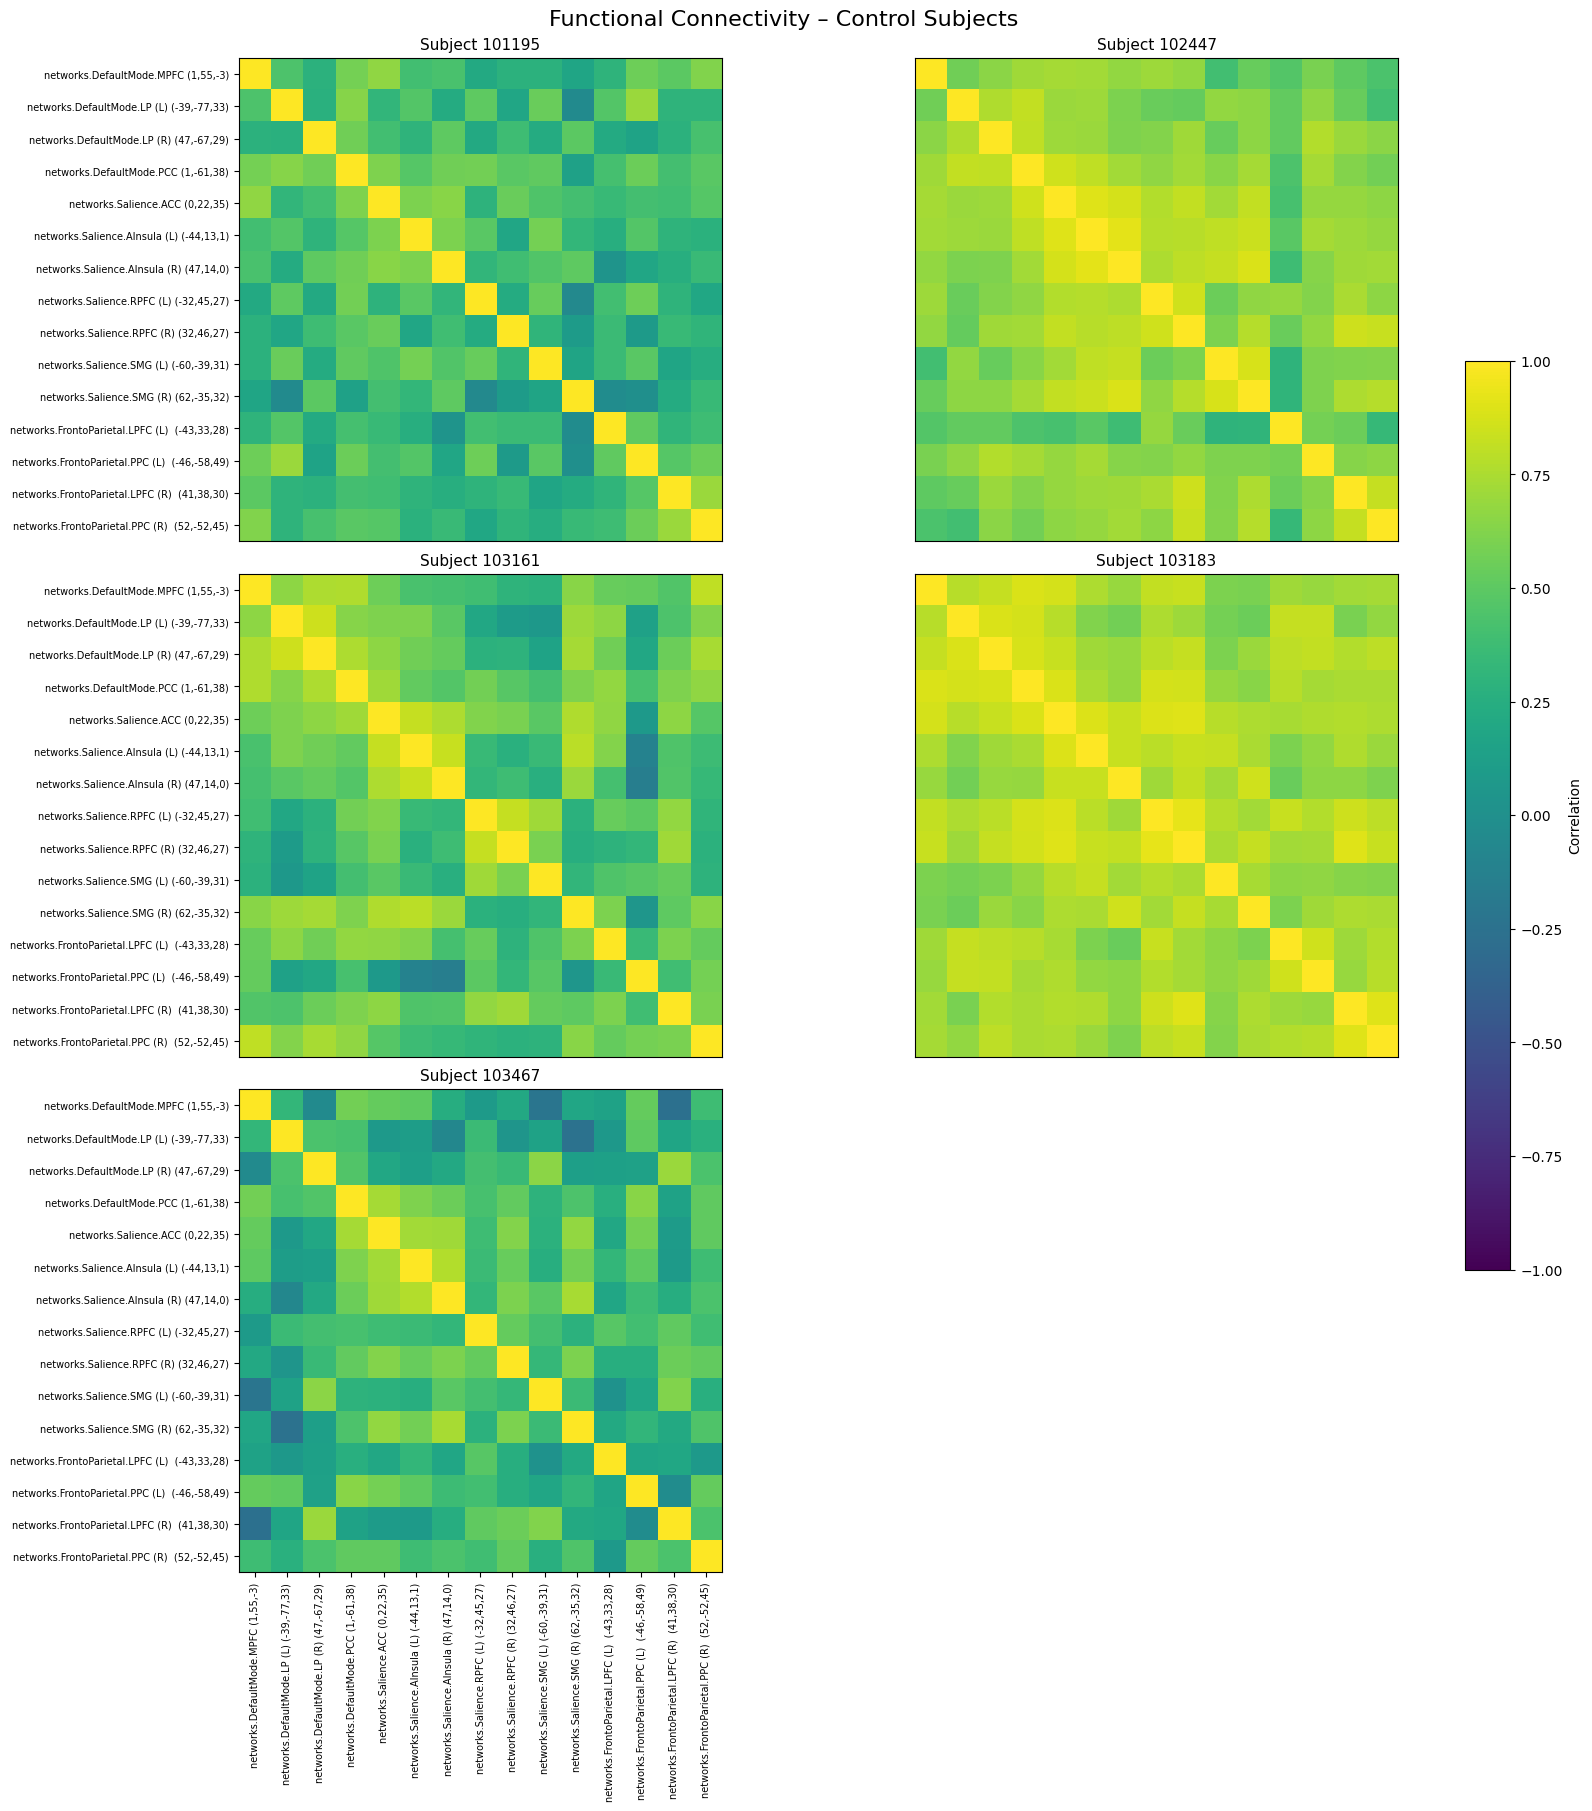

In [ ]:
#@title Control without depression
plot_fc_grid(
    FC_all_ctrl_r,
    ctrl_subjects,
    roi_labels,
    title="Functional Connectivity – Control Subjects"
)

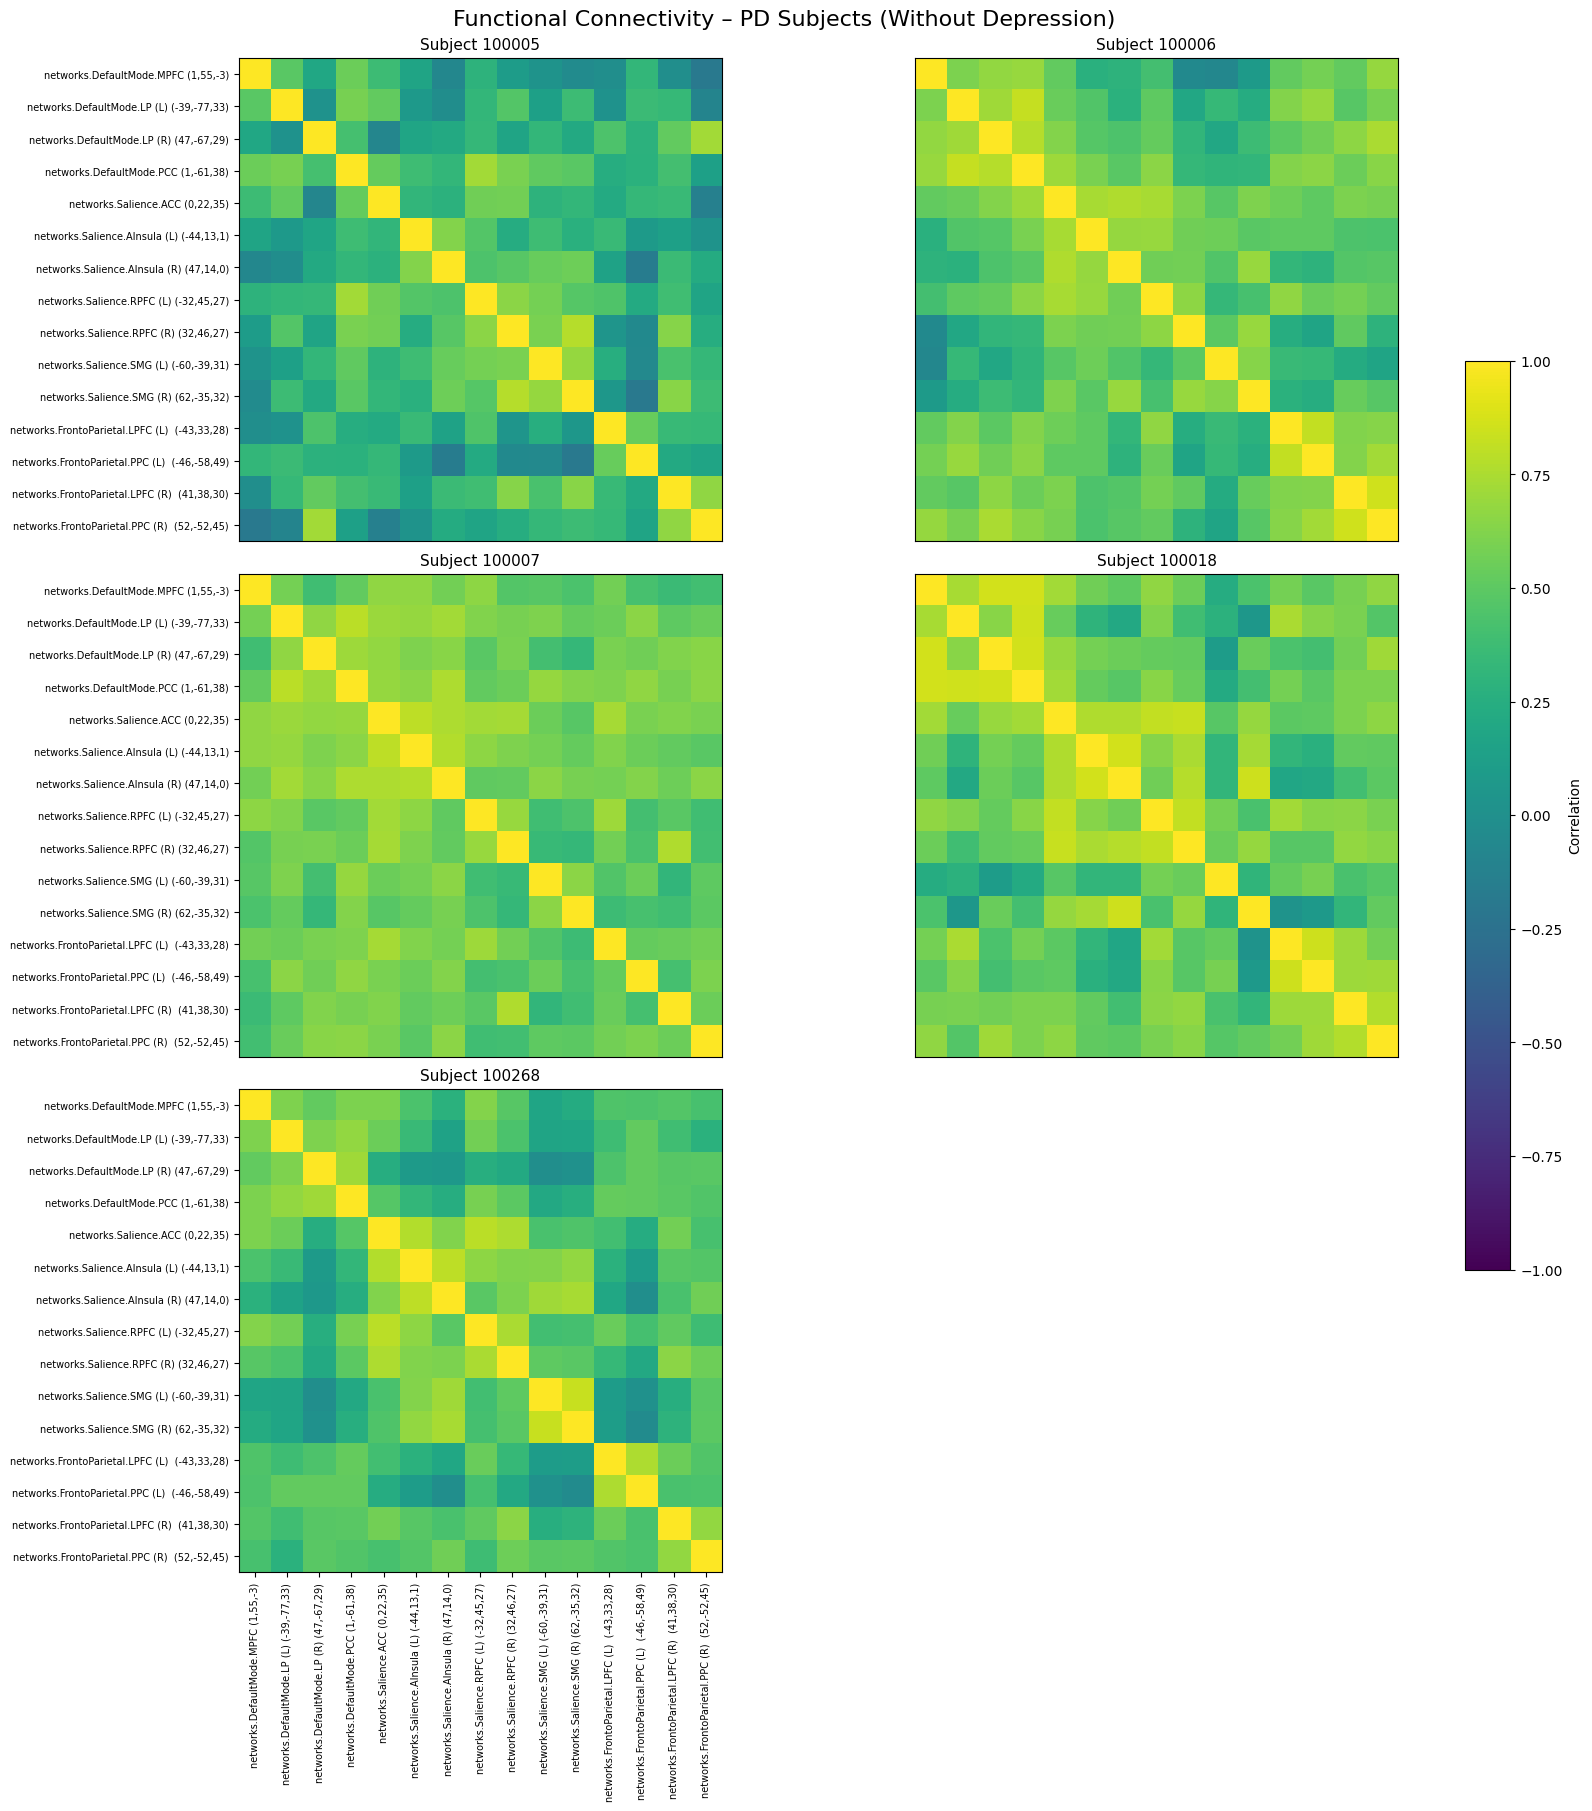

In [ ]:
#@title PD without depression
plot_fc_grid(
    FC_all_pd_r,
    pd_subjects,
    roi_labels,
    title="Functional Connectivity – PD Subjects (Without Depression)"
)


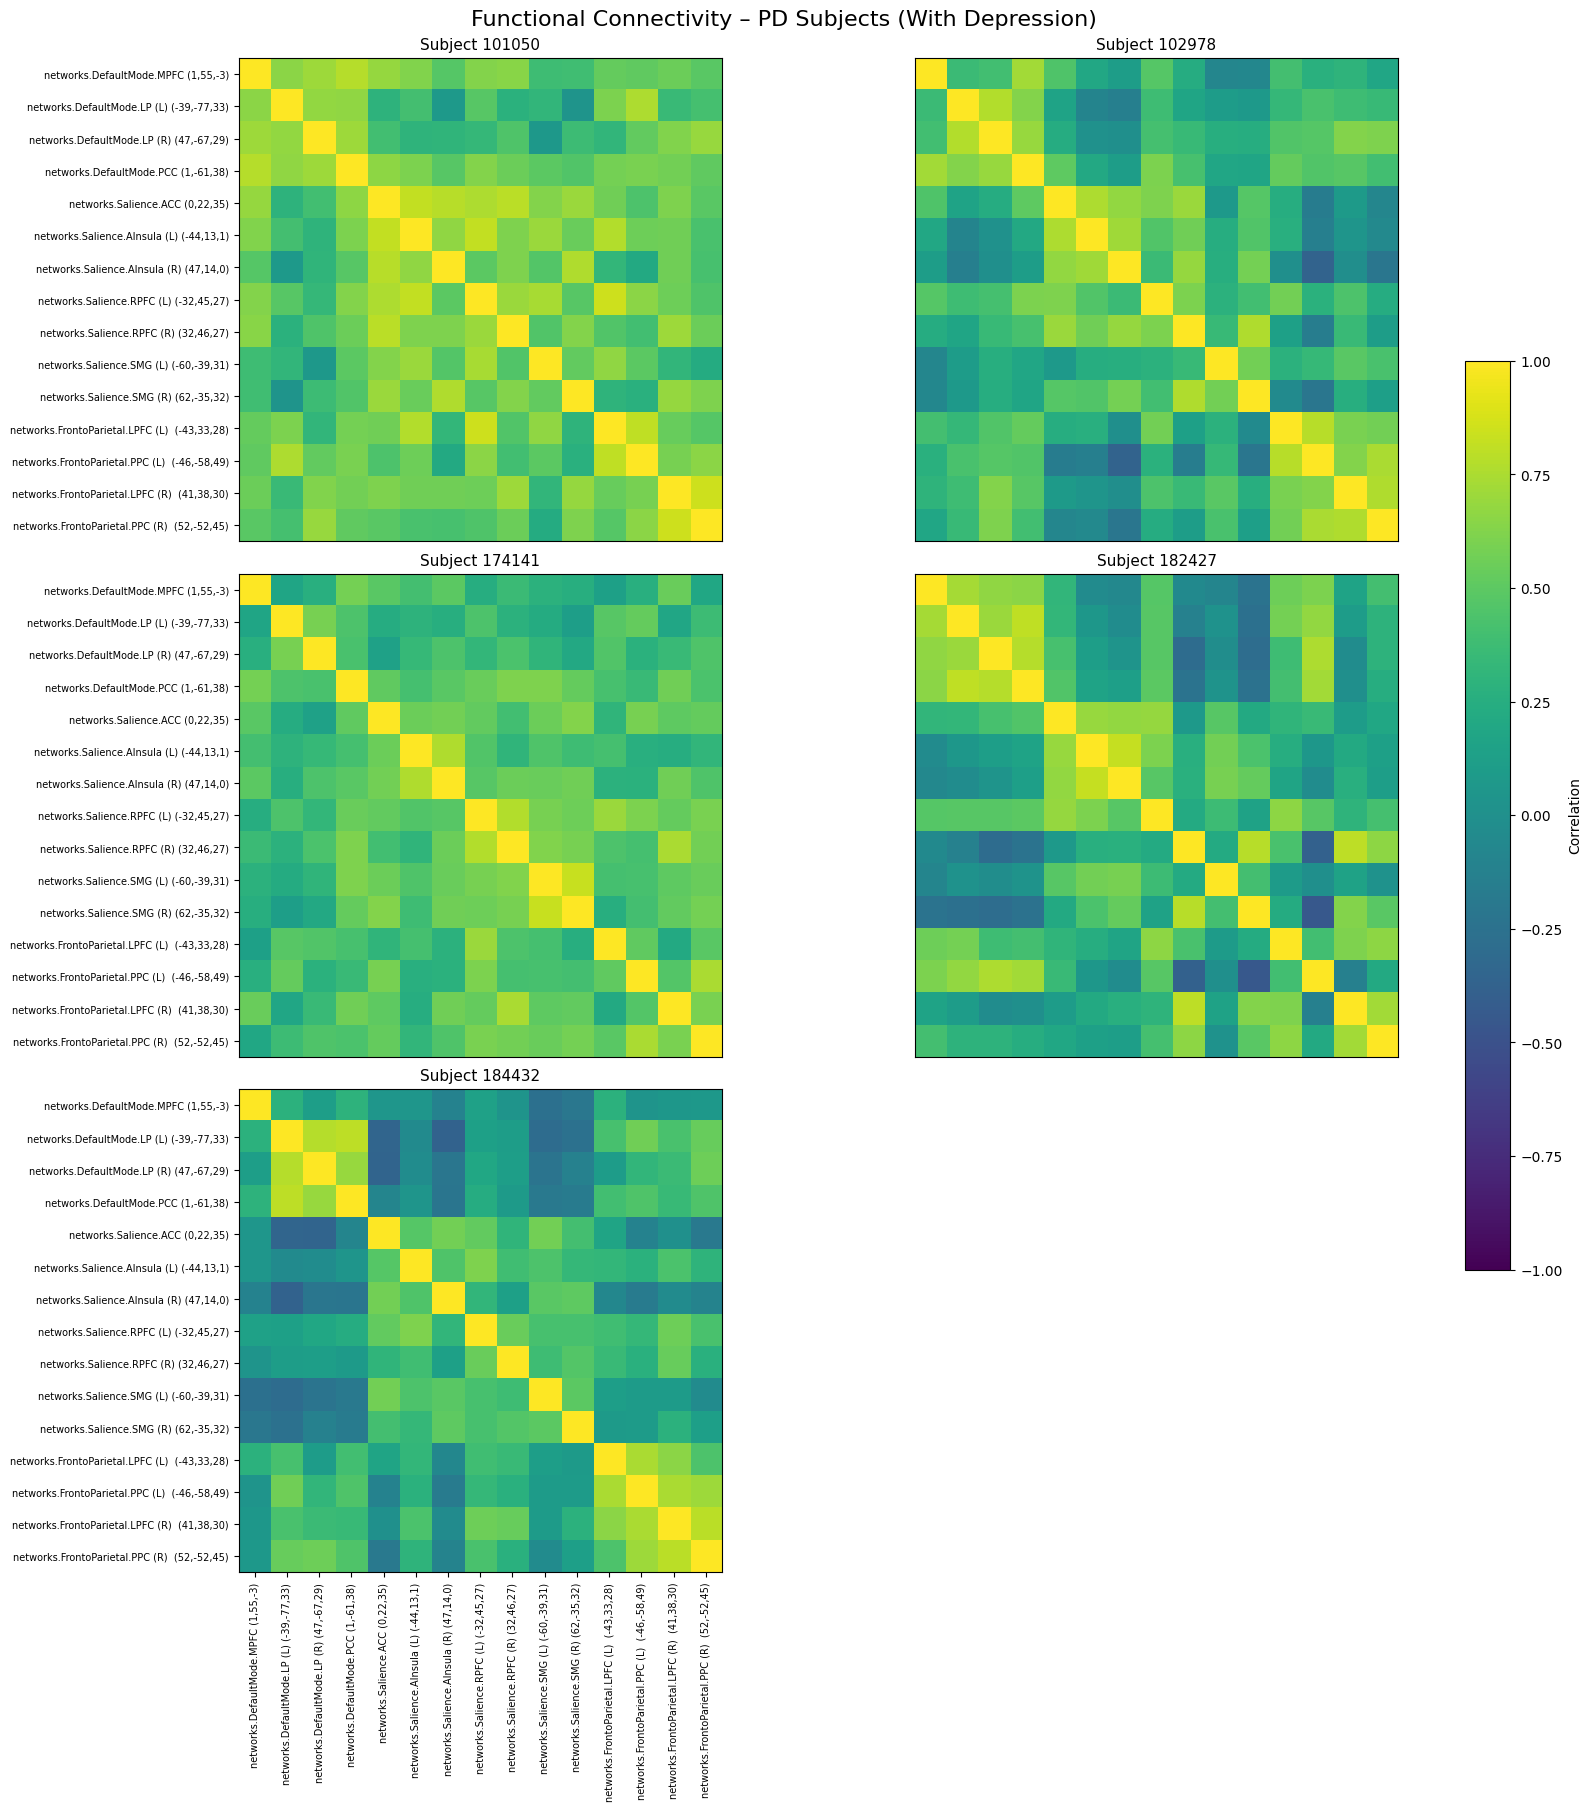

In [ ]:
#@title Control with depression
plot_fc_grid(
    FC_all_pd_dep_r,
    pd_subjects_dep,
    roi_labels,
    title="Functional Connectivity – PD Subjects (With Depression)"
)


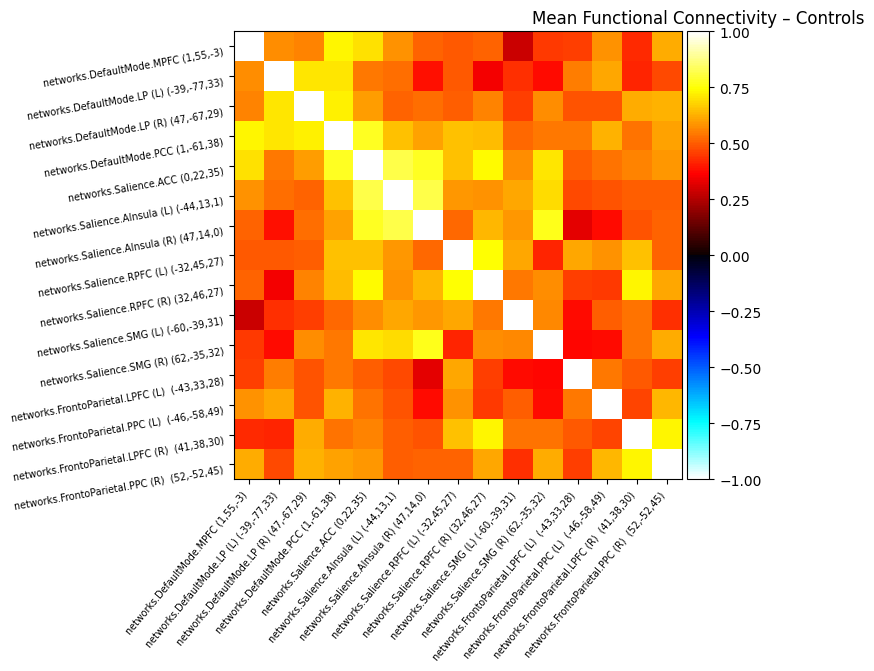

In [ ]:
#@title Mean FC
plotting.plot_matrix(
    FC_ctrl_mean_r,
    labels=roi_labels,
    vmin=-1,
    vmax=1,
    cmap="cold_hot",
    figure=(8, 8)
)
plt.title("Mean Functional Connectivity – Controls")
plt.show()


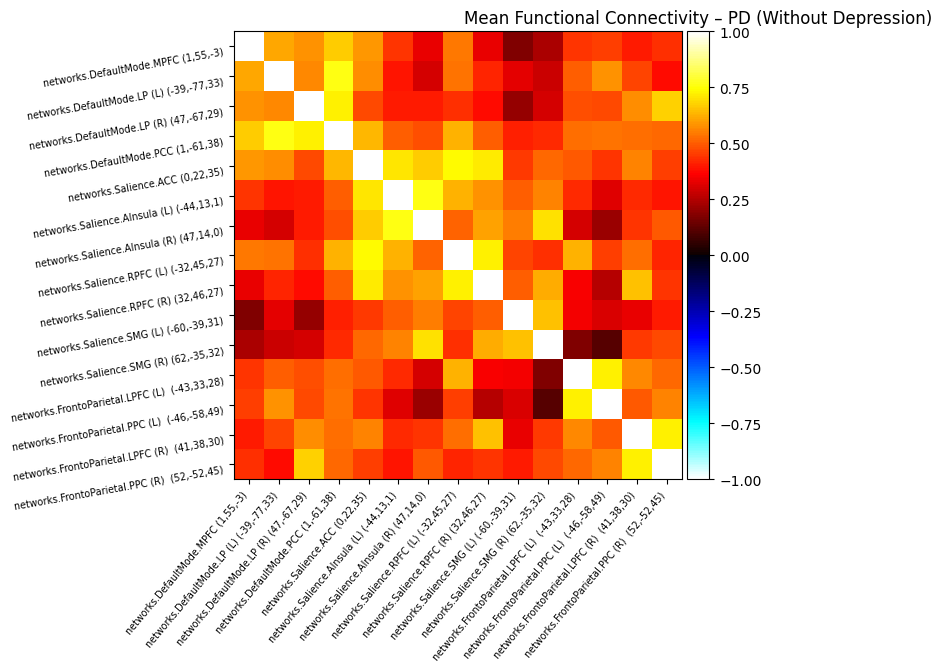

In [ ]:
plotting.plot_matrix(
    FC_pd_mean_r,
    labels=roi_labels,
    vmin=-1,
    vmax=1,
    cmap="cold_hot",
    figure=(8, 8)
)
plt.title("Mean Functional Connectivity – PD (Without Depression)")
plt.show()


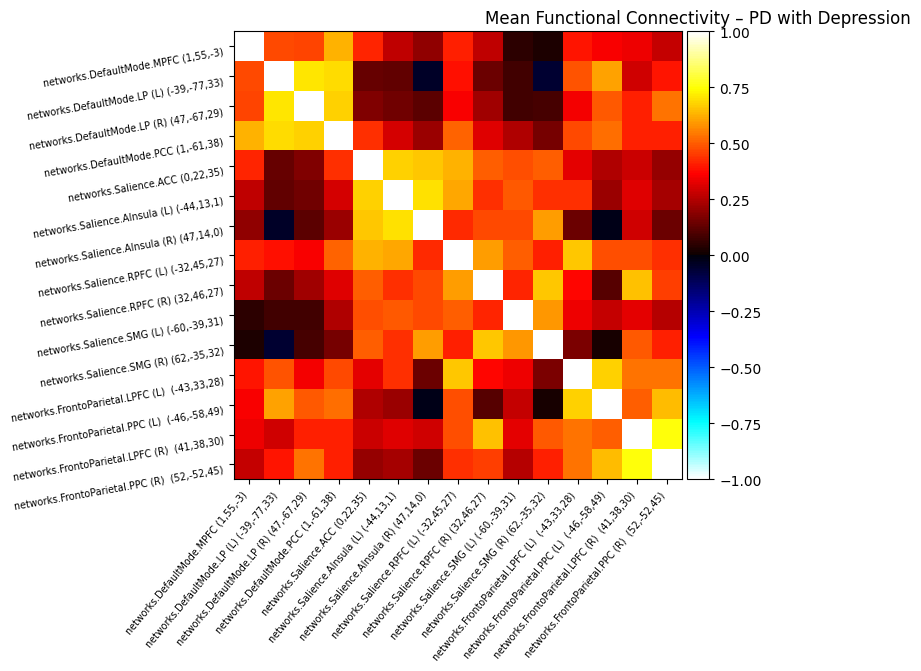

In [ ]:
plotting.plot_matrix(
    FC_pd_dep_mean_r,
    labels=roi_labels,
    vmin=-1,
    vmax=1,
    cmap="cold_hot",
    figure=(8, 8)
)
plt.title("Mean Functional Connectivity – PD with Depression")
plt.show()


In [ ]:
#@title Statistical Tests
n_rois = FC_all_ctrl_z.shape[1]
iu = np.triu_indices(n_rois, k=1)  # solo edges únicos
n_edges = len(iu[0])
print(f"Number of tested edges: {n_edges}")

Number of tested edges: 105


In [ ]:
from scipy.stats import ttest_ind

t_vals = np.zeros(n_edges)
p_vals = np.zeros(n_edges)

for k, (i, j) in enumerate(zip(iu[0], iu[1])):
    z_pd = FC_all_pd_z[:, i, j]
    z_pd_dep = FC_all_pd_dep_z[:, i, j]

    t, p = ttest_ind(
        z_pd,
        z_pd_dep,
        equal_var=False,   #Welch t-test
        nan_policy="omit"
    )

    t_vals[k] = t
    p_vals[k] = p


In [ ]:
from statsmodels.stats.multitest import multipletests

alpha = 0.05
rej, p_vals_fdr, _, _ = multipletests(
    p_vals,
    alpha=alpha,
    method="fdr_bh"
)

In [ ]:
T_matrix = np.zeros((n_rois, n_rois))
T_matrix[iu] = t_vals
T_matrix = T_matrix + T_matrix.T

In [ ]:
Sig_matrix = np.zeros((n_rois, n_rois), dtype=bool)
Sig_matrix[iu] = rej
Sig_matrix = Sig_matrix | Sig_matrix.T

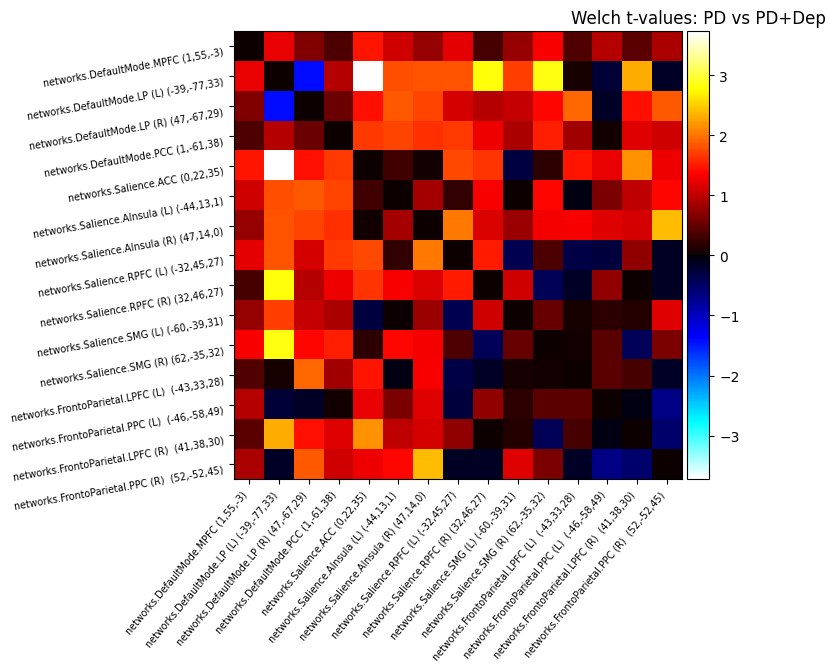

In [ ]:
plotting.plot_matrix(
    T_matrix,
    labels=roi_labels,
    cmap="cold_hot",
    figure=(8, 8),
    vmax=np.max(np.abs(T_matrix)),
    vmin=-np.max(np.abs(T_matrix))
)
plt.title("Welch t-values: PD vs PD+Dep")
plt.show()

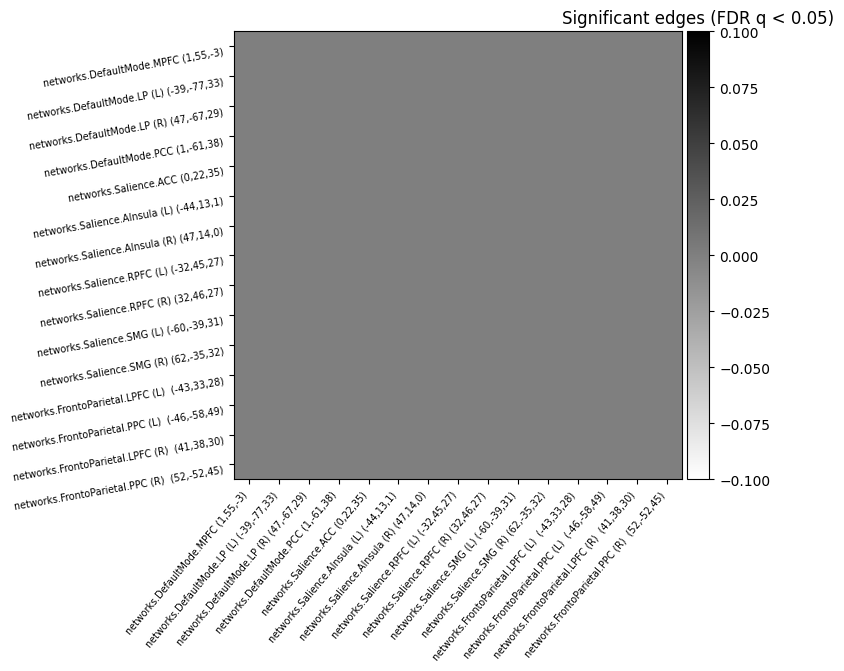

In [ ]:
plotting.plot_matrix(
    Sig_matrix.astype(int),
    labels=roi_labels,
    cmap="gray_r",
    figure=(8, 8)
)
plt.title("Significant edges (FDR q < 0.05)")
plt.show()

#Dynamic Functional Connectivity

#Network-level connectivity

#Graph-theoretical metrics

#Dynamic Functional Connectivity

#Interpretability & visualization